<a href="https://colab.research.google.com/github/urmilapol/Blockchain-ligh-/blob/main/diabetes_prediction_with_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
import math
from scipy.stats import norm, skew

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_diab=pd.read_csv('/content/sample_data/pima-indians-diabetes.csv')
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df_diab.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


KeyError: ignored

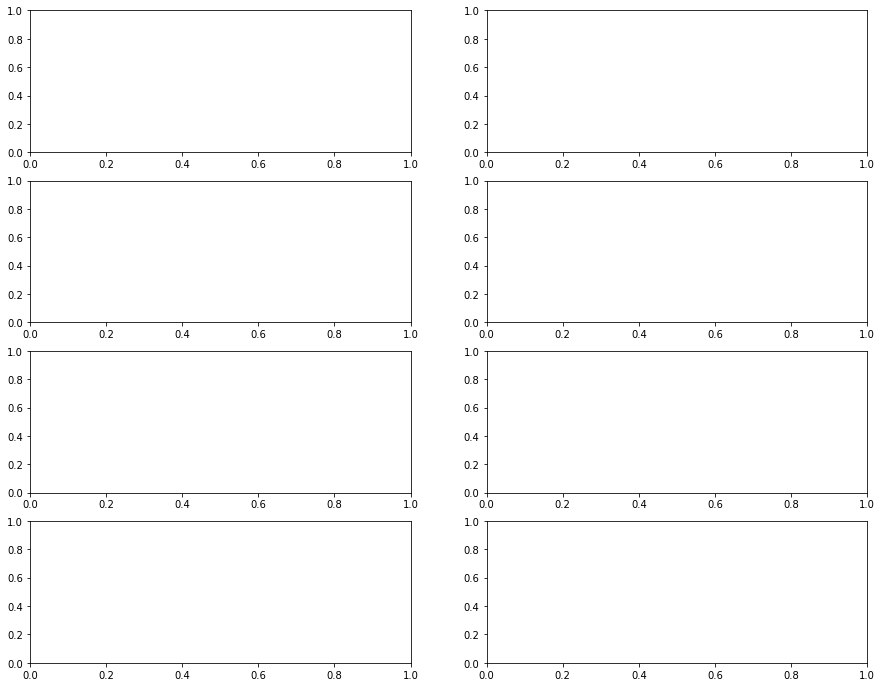

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(df_diab['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df_diab['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(df_diab['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(df_diab['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(df_diab['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(df_diab['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(df_diab['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(df_diab['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

KeyError: ignored

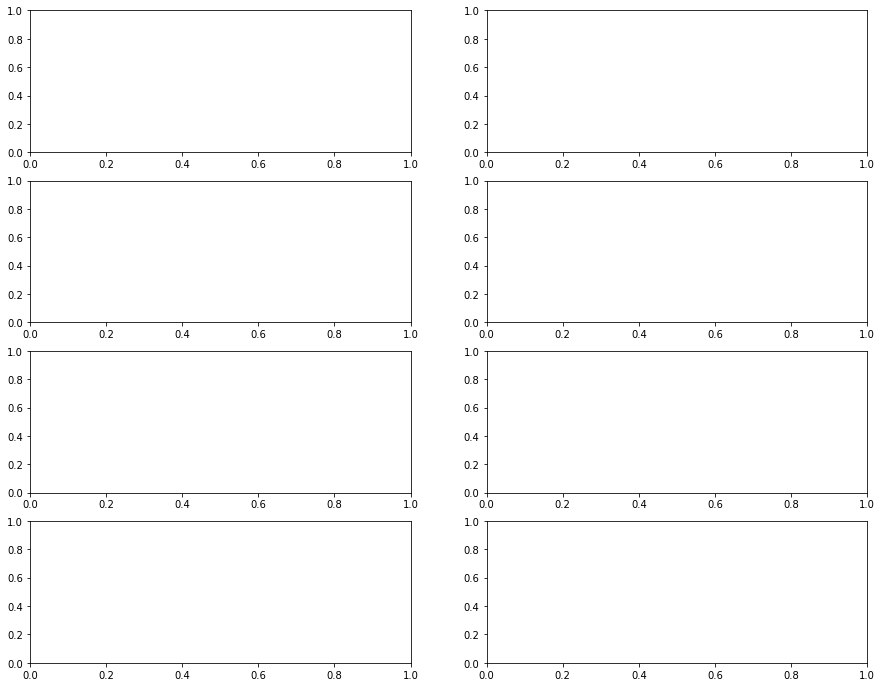

In [6]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.boxplot(df_diab['Pregnancies'],ax=axs[0])
sns.boxplot(df_diab['Glucose'],ax=axs[1])
sns.boxplot(df_diab['BloodPressure'],ax=axs[2])
sns.boxplot(df_diab['SkinThickness'],ax=axs[3])
sns.boxplot(df_diab['Insulin'],ax=axs[4])
sns.boxplot(df_diab['BMI'],ax=axs[5])
sns.boxplot(df_diab['DiabetesPedigreeFunction'],ax=axs[6])
sns.boxplot(df_diab['Age'],ax=axs[7])
plt.show()

In [ ]:
data = df_diab.sample(frac=0.8, random_state=42)
data_unseen = df_diab.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))

Data for Modeling: (614, 9)


In [7]:
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

NameError: ignored

In [8]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing 

In [10]:
from pycaret.classification import *

In [ ]:
numeric_features=data.columns.tolist()
numeric_features.remove('Outcome')
numeric_features[:]

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
diabetes = setup(data = data, target = 'Outcome', session_id=42,
                  normalize = True, 
                  transformation = True, 
                  log_experiment = True,
                  handle_unknown_categorical = True, 
                  unknown_categorical_method = 'most_frequent',
                  remove_multicollinearity = True, #rop one of the two features that are highly correlated with each other
                  ignore_low_variance = True,#all categorical features with statistically insignificant variances are removed from the dataset.
                  combine_rare_levels = True,# all levels in categorical features below the threshold defined in rare_level_threshold param are combined together as a single level
                  numeric_imputation='median',
                  categorical_imputation='mode',
                 fix_imbalance = True,
                numeric_features=numeric_features,
                 normalize_method = 'robust',
                  train_size = 0.8
                )

,Description,Value
0,session_id,42
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(614, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7678,0.8129,0.6788,0.6408,0.6521,0.4794,0.4878,0.3270
catboost,CatBoost Classifier,0.7659,0.8197,0.6921,0.6364,0.6575,0.4816,0.4886,2.0960
gbc,Gradient Boosting Classifier,0.7618,0.8282,0.6792,0.6343,0.6476,0.4700,0.4788,0.0810
et,Extra Trees Classifier,0.7496,0.8071,0.6158,0.6267,0.6146,0.4303,0.4357,0.2780
ridge,Ridge Classifier,0.7475,0.0000,0.7612,0.5938,0.6647,0.4688,0.4802,0.0120
lda,Linear Discriminant Analysis,0.7475,0.8323,0.7612,0.5938,0.6647,0.4688,0.4802,0.0120
lr,Logistic Regression,0.7474,0.8305,0.7483,0.5956,0.6611,0.4655,0.4745,0.3920
lightgbm,Light Gradient Boosting Machine,0.7414,0.7943,0.6475,0.6060,0.6200,0.4258,0.4315,0.1450
dt,Decision Tree Classifier,0.7353,0.6977,0.5912,0.6073,0.5937,0.3988,0.4027,0.0130
nb,Naive Bayes,0.7312,0.8163,0.7479,0.5810,0.6474,0.4393,0.4544,0.0120


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)